In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import numpy as np

In [2]:
# Initialize an empty list to hold individual dataframes
df_list = []

# Directory containing the text files
data_dir = '/app/random_snellen_letters_results'

# Loop through each text file and read it into a DataFrame
for filename in os.listdir(data_dir):
    if filename.startswith("results_") and filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        # Assuming each line in the text file is a seperate entry
        temp_df = pd.read_csv(filepath, header=None, names=['Combination'])
        df_list.append(temp_df)
# Combine all the dataframe into a single dataframe
final_df = pd.concat(df_list, ignore_index=True)

In [3]:
# Initialize an empty list to hold individual dataframes
df_list = []

# Directory containing the text files
data_dir = '/app/random_snellen_letters_results'  # Update this path to the one in your Docker volume

# Loop through each text file and read it into a DataFrame
for filename in os.listdir(data_dir):
    if filename.startswith("results_") and filename.endswith(".txt"):
        filepath = os.path.join(data_dir, filename)
        # Assuming each line in the text file is a separate entry
        temp_df = pd.read_csv(filepath, header=None, names=['Combination'])
        df_list.append(temp_df)

# Combine all the dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.head(5)

,Combination
0,PCOTEDZ
1,TELZDFO
2,FPLZECO
3,DLCEPZO
4,CTLEZPD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304893 entries, 0 to 304892
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Combination  304893 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


## Let's check the frequency of each letter in all the lines combined

In [6]:
from collections import Counter

# Initialize an empty Counter object to hold the frequencies of each letter
letter_frequency = Counter()

# Loop through each row in the DataFrame to update the letter frequencies
for index, row in df.iterrows():
    combination = row['Combination']
    letter_frequency.update(combination)
    
# Convert the Counter object to a DataFrame for easier analysis
letter_frequency_df = pd.DataFrame.from_dict(letter_frequency, orient='index', columns=['Frequency']).reset_index()
letter_frequency_df.rename(columns={'index': 'Letter'}, inplace=True)

# Sort the DataFrame by frequency
letter_frequency_df.sort_values('Frequency', ascending=False, inplace=True)

print(f'There are {len(letter_frequency_df)} unique letters to chose from')
letter_frequency_df

There are 9 unique letters to chose from


,Letter,Frequency
5,D,237695
4,E,237673
8,F,237402
2,O,237362
7,L,237286
0,P,237193
1,C,237058
6,Z,236538
3,T,236044


## Next we'll look at how random the combination of letters really was.

In [7]:
# Count the frequency of each unique 7-letter combination
combination_frequency = df['Combination'].value_counts().reset_index()

# Rename the columns for better readability
combination_frequency.columns = ['Combination', 'Frequency']

# Sort the DataFrame by frequency
combination_frequency.sort_values('Frequency', ascending=False, inplace=True)

print(combination_frequency.head())
print('\n')
print(f"The length of the original df is {len(df)}, and the length of combination_frequency is {len(combination_frequency)}")

    Combination  Frequency
0       DTPZCTZ          3
148     OCFZDZD          3
137     LDPFCLD          3
138     ETDOLFZ          3
139     LOEOLED          3


The length of the original df is 304893, and the length of combination_frequency is 291867


In [8]:
combination_frequency.tail()

,Combination,Frequency
105834,CDPEOEL,1
105835,LCDZFPT,1
105836,FTETEDE,1
105837,TCFTOCE,1
291866,CEDCLCP,1


In [9]:
# Calculate basic statistical measures for individual letter frequencies
mean_frequency = letter_frequency_df['Frequency'].mean()
median_frequency = letter_frequency_df['Frequency'].median()
std_frequency = letter_frequency_df['Frequency'].std()

print(f"This is the mean frequency: {mean_frequency}")
print(f"This is the median frequency: {median_frequency}")
print(f"Here is the standard deviation frequency: {std_frequency}")

This is the mean frequency: 237139.0
This is the median frequency: 237286.0
Here is the standard deviation frequency: 536.7147752764032


In [10]:
# Function to check if the combination is a palindrome
def is_palindrome(combination):
    return combination == combination[::-1]

# Function to find the letter that appears the most times
def max_repeated_letter(combination):
    letter_counts = Counter(combination)
    max_letter = max(letter_counts, key=letter_counts.get)
    return max_letter if letter_counts[max_letter] > 1 else None

# Function to measure letter diversity
def letter_diversity(combination):
    return len(set(combination)) / len(combination)

# Function to count the frequency of each letter in a combination and filter those that appear more than once
def count_repeated_letters(combination):
    letter_counts = Counter(combination)
    repeated_letters = {letter: count for letter, count in letter_counts.items() if count > 1}
    return repeated_letters if repeated_letters else None

# Add the new columns to the DataFrame
df['Is_Palindrome'] = df['Combination'].apply(is_palindrome)
df['Max_Repeated'] = df['Combination'].apply(max_repeated_letter)
df['Letter_Diversity'] = df['Combination'].apply(letter_diversity)
df['Repeated_Letters'] = df['Combination'].apply(count_repeated_letters)

In [20]:
df.head(20)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
0,PCOTEDZ,False,None,1.0,None
1,TELZDFO,False,None,1.0,None
2,FPLZECO,False,None,1.0,None
3,DLCEPZO,False,None,1.0,None
4,CTLEZPD,False,None,1.0,None
5,ZFPCETO,False,None,1.0,None
6,FECZOLT,False,None,1.0,None
7,POCTDLE,False,None,1.0,None
8,LPTCZED,False,None,1.0,None
9,DZFPETL,False,None,1.0,None


In [18]:
df.tail(20)

,Combination,Is_Palindrome,Max_Repeated,Letter_Diversity,Repeated_Letters
304873,TLFZOZC,False,Z,0.857143,{'Z': 2}
304874,ZCLTPFT,False,T,0.857143,{'T': 2}
304875,OPTPZFZ,False,P,0.714286,"{'P': 2, 'Z': 2}"
304876,EFDFLET,False,E,0.714286,"{'E': 2, 'F': 2}"
304877,FCFDZOD,False,F,0.714286,"{'F': 2, 'D': 2}"
304878,DODLEDZ,False,D,0.714286,{'D': 3}
304879,FTOCZTL,False,T,0.857143,{'T': 2}
304880,OCODLDL,False,O,0.571429,"{'O': 2, 'D': 2, 'L': 2}"
304881,OTEPZOL,False,O,0.857143,{'O': 2}
304882,ZEOZDLE,False,Z,0.714286,"{'Z': 2, 'E': 2}"


## Historgram of Letter Diversity

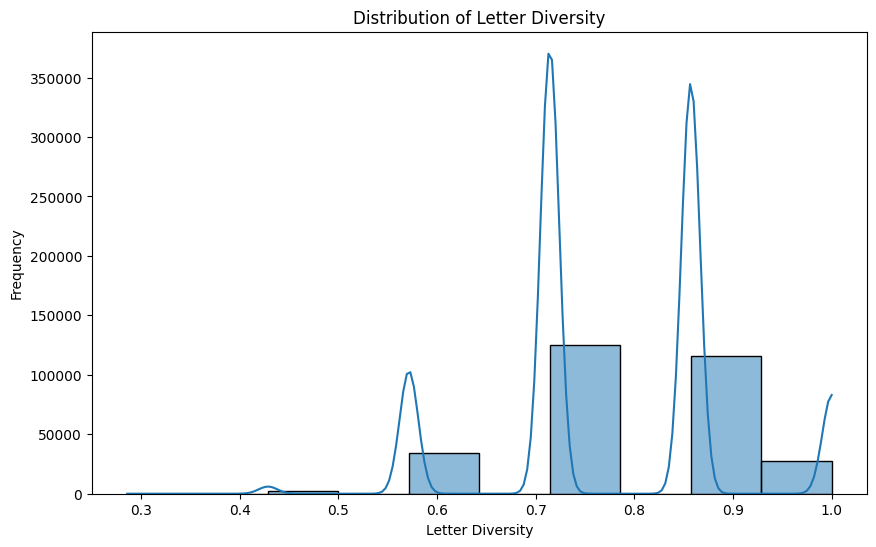

In [38]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Letter_Diversity'], bins=10, kde=True)
plt.title('Distribution of Letter Diversity')
plt.xlabel('Letter Diversity')
plt.ylabel('Frequency')
plt.show()

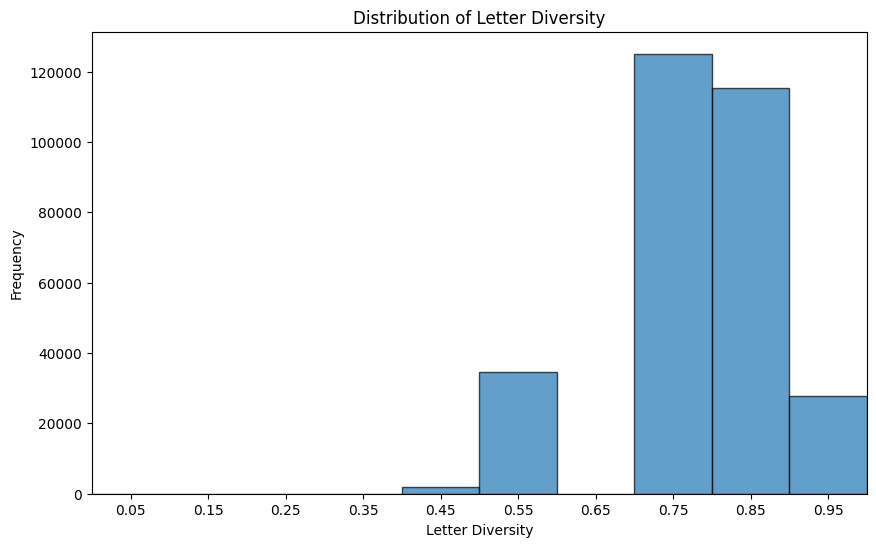

In [36]:
# Define custom bin edges
# Define custom bin edges
bin_edges = np.linspace(0, 1, 11)  # Creates 10 bins from 0 to 1

plt.figure(figsize=(10, 6))

# Create the histogram with custom bin edges
n, bins, patches = plt.hist(df['Letter_Diversity'], bins=bin_edges, edgecolor='black', alpha=0.7)

# Calculate the midpoints of the bins
midpoints = bins[:-1] + 0.5 * np.diff(bins)

# Set the x-ticks to be the midpoints
plt.xticks(midpoints, labels=[round(mid, 2) for mid in midpoints])

# Explicitly set the x-axis limits to include 1.0
plt.xlim(0, 1)

plt.title('Distribution of Letter Diversity')
plt.xlabel('Letter Diversity')
plt.ylabel('Frequency')
plt.show()

## Bar Chart for Max Repeated Letters

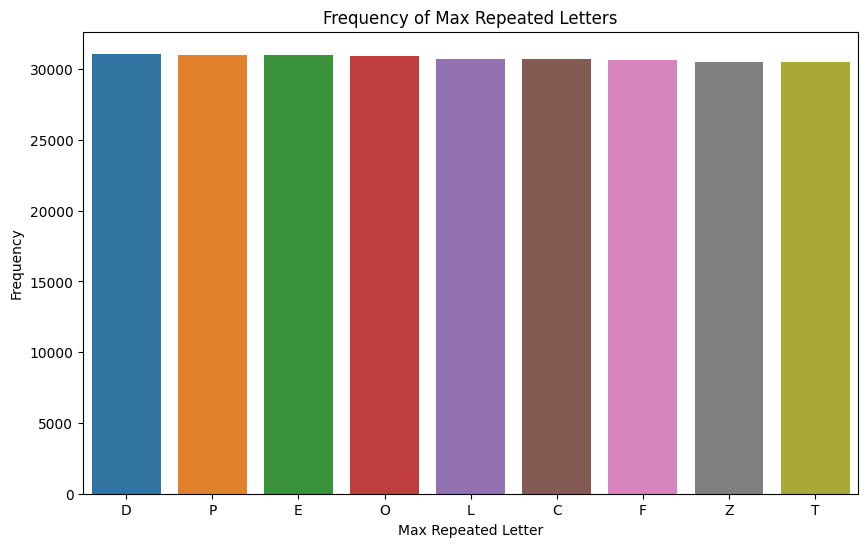

In [23]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Max_Repeated', order=df['Max_Repeated'].value_counts().index)
plt.title('Frequency of Max Repeated Letters')
plt.xlabel('Max Repeated Letter')
plt.ylabel('Frequency')
plt.show()

## Histogram for Palindromes

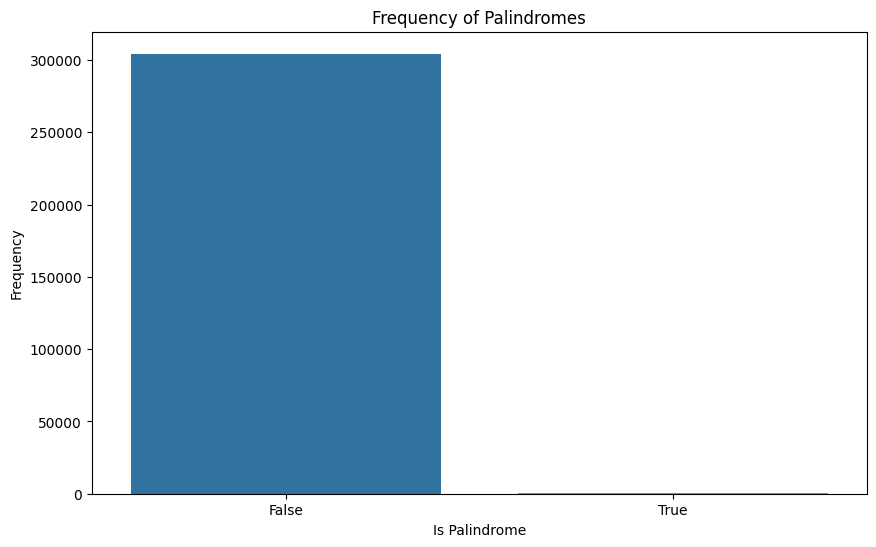

In [24]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Is_Palindrome')
plt.title('Frequency of Palindromes')
plt.xlabel('Is Palindrome')
plt.ylabel('Frequency')
plt.show()